In [1]:
import pandas as pd
import ggplot as gg
import numpy as np

In [2]:
df = pd.read_csv('data/FOIA - 504 (FY1991-Present).csv')
df.columns = [c.lower().replace(' ', '_') for c in df.columns]
df.sbadistrictoffice = df.sbadistrictoffice.str.replace('\xa0', '')

/Users/trevor/Code/datasci-sba-problem-2/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (11,12,13,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
sfdf = df.loc[df.sbadistrictoffice == 'SAN FRANCISCO DISTRICT OFFICE']

In [4]:
sfdf.head()

,program,borrname,borrstreet,borrcity,borrstate,borrzip,cdc_name,cdc_street,cdc_city,cdc_state,...,franchisename,projectcounty,projectstate,sbadistrictoffice,congressionaldistrict,businesstype,loanstatus,chargeoffdate,grosschargeoffamount,jobssupported
24,504,BAY AREA DRILLING,"549 GARCIA AVENUE, LOTS 6,7",PITTSBURG,CA,94565,Bay Area Employment Development Company,1801 Oakland Boulevard,Walnut Creek,CA,...,NaN,CONTRA COSTA,CA,SAN FRANCISCO DISTRICT OFFICE,11.0,INDIVIDUAL,PIF,NaN,0,16
102,504,"ARCHITECTURAL ART MFG, INC","7755 PARDEE LANE, STE E",OAKLAND,CA,94621,Bay Area Employment Development Company,1801 Oakland Boulevard,Walnut Creek,CA,...,NaN,LAKE,CA,SAN FRANCISCO DISTRICT OFFICE,13.0,CORPORATION,PIF,NaN,0,23
262,504,"GREEN VALLEY FOODS, INC.",1985 TEXAS STREETG,FAIRFIELD,CA,94533,SBA - EDF Enforcement Action,SBA Denver Finance Center,Denver,CO,...,EL POLLO LOCO,SOLANO,CA,SAN FRANCISCO DISTRICT OFFICE,3.0,CORPORATION,CANCLD,NaN,0,34
320,504,"DIGICOM SYSTEMS, INC.",182 TOPAZ STREET,MILPITAS,CA,95035,Mortgage Capital Development Corporation,1720 Broadway,Oakland,CA,...,NaN,SANTA CLARA,CA,SAN FRANCISCO DISTRICT OFFICE,17.0,CORPORATION,PIF,NaN,0,60
546,504,"PATSON'S PRESS, INC.",508 TASMAN,SUNNYVALE,CA,94089,"Capital Access Group, Inc.",150 California Street,San Francisco,CA,...,NaN,SANTA CLARA,CA,SAN FRANCISCO DISTRICT OFFICE,17.0,CORPORATION,PIF,NaN,0,112


In [5]:
sfdf.columns.values.tolist()

['program',
 'borrname',
 'borrstreet',
 'borrcity',
 'borrstate',
 'borrzip',
 'cdc_name',
 'cdc_street',
 'cdc_city',
 'cdc_state',
 'cdc_zip',
 'thirdpartylender_name',
 'thirdpartylender_city',
 'thirdpartylender_state',
 'thirdpartydollars',
 'grossapproval',
 'approvaldate',
 'approvalfiscalyear',
 'firstdisbursementdate',
 'deliverymethod',
 'subpgmdesc',
 'initialinterestrate',
 'terminmonths',
 'naicscode',
 'naicsdescription',
 'franchisecode',
 'franchisename',
 'projectcounty',
 'projectstate',
 'sbadistrictoffice',
 'congressionaldistrict',
 'businesstype',
 'loanstatus',
 'chargeoffdate',
 'grosschargeoffamount',
 'jobssupported']

In [6]:
p = gg.ggplot(gg.aes(x='approvalfiscalyear'), data=sfdf)

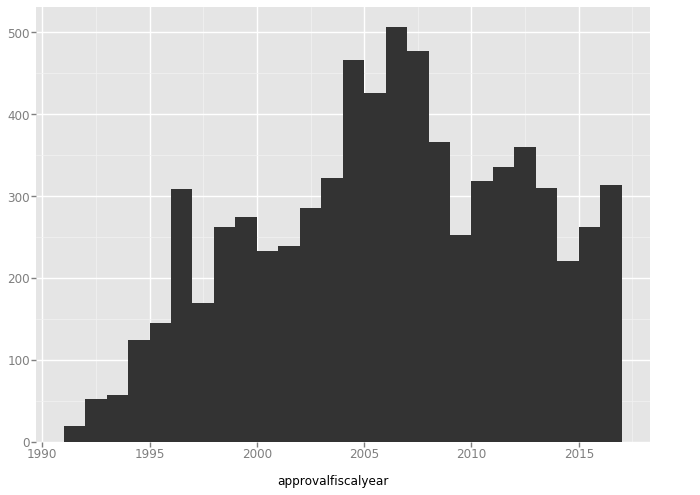

<ggplot: (296573893)>

In [7]:
p + gg.geom_histogram(binwidth=1)

In [8]:
grouped = sfdf.groupby('approvalfiscalyear', as_index=False)

In [9]:
p = gg.ggplot(gg.aes(x='approvalfiscalyear', y='grossapproval'), data=grouped['grossapproval'].agg(np.mean))

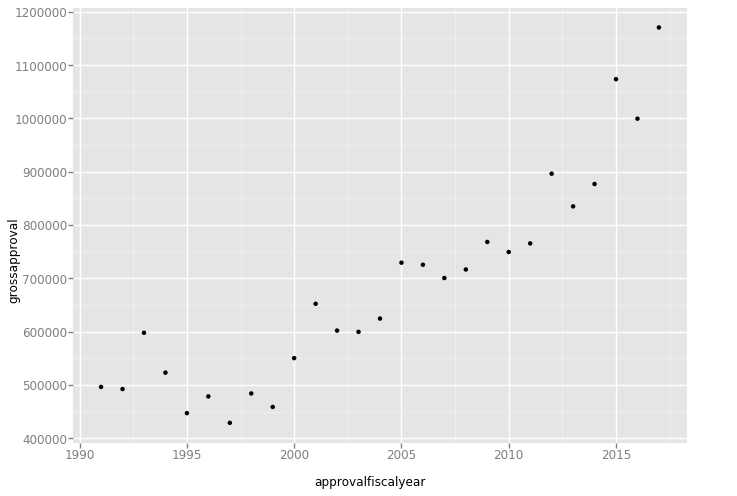

<ggplot: (291610488)>

In [10]:
p + gg.geom_point()